<a href="https://colab.research.google.com/github/ghanamohanty2005/ghanamohanty2005/blob/main/Leukemia.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# Load the dataset
file_path = '/content/lukemia_3C_fixed.csv'
data = pd.read_csv(file_path)

In [ ]:
# Step-1: Data Pre-processing
# Quick data inspection
print("Dataset Preview:")
display(data.head())
print("\nDataset Information:")
data.info()
print("\nDescriptive Statistics:")
print(data.describe())

Dataset Preview:


,AFFX-BioB-5_at,AFFX-BioB-M_at,AFFX-BioB-3_at,AFFX-BioC-5_at,AFFX-BioC-3_at,AFFX-BioDn-5_at,AFFX-BioDn-3_at,AFFX-CreX-5_at,AFFX-CreX-3_at,AFFX-BioB-5_st,...,U58516_at,U73738_at,X06956_at,X16699_at,X83863_at,Z17240_at,L49218_f_at,M71243_f_at,Z78285_f_at,CLASS
0,-342.0,-200.0,41.0,328.0,-224.0,-427.0,-656.0,-292.0,137.0,-144.0,...,1023.0,67.0,214.0,-135.0,1074.0,475.0,48.0,168.0,-70.0,b'B-cell'
1,-87.0,-248.0,262.0,295.0,-226.0,-493.0,367.0,-452.0,194.0,162.0,...,529.0,-295.0,352.0,-67.0,67.0,263.0,-33.0,-33.0,-21.0,b'B-cell'
2,-62.0,-23.0,-7.0,142.0,-233.0,-284.0,-167.0,-97.0,-12.0,-70.0,...,383.0,46.0,104.0,15.0,245.0,164.0,84.0,100.0,-18.0,b'B-cell'
3,22.0,-153.0,17.0,276.0,-211.0,-250.0,55.0,-141.0,0.0,500.0,...,399.0,16.0,558.0,24.0,893.0,297.0,6.0,1971.0,-42.0,b'B-cell'
4,86.0,-36.0,-141.0,252.0,-201.0,-384.0,-420.0,-197.0,-60.0,-468.0,...,91.0,-84.0,615.0,-52.0,1235.0,9.0,7.0,1545.0,-81.0,b'B-cell'



Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72 entries, 0 to 71
Columns: 7130 entries, AFFX-BioB-5_at to CLASS
dtypes: float64(7129), object(1)
memory usage: 3.9+ MB

Descriptive Statistics:
       AFFX-BioB-5_at  AFFX-BioB-M_at  AFFX-BioB-3_at  AFFX-BioC-5_at  \
count       72.000000       72.000000       72.000000       72.000000   
mean      -114.583333     -160.125000       -8.069444      189.347222   
std         97.738333       96.136631      122.697995      111.884014   
min       -476.000000     -531.000000     -410.000000      -36.000000   
25%       -148.000000     -213.500000      -77.250000       99.500000   
50%       -100.500000     -144.000000      -14.000000      179.000000   
75%        -57.500000      -96.750000       49.000000      277.750000   
max         86.000000      -13.000000      312.000000      431.000000   

       AFFX-BioC-3_at  AFFX-BioDn-5_at  AFFX-BioDn-3_at  AFFX-CreX-5_at  \
count       72.000000        72.000000        72

In [ ]:
# Check for missing values
missing_values = data.isnull().sum()
print("\nMissing Values:\n", missing_values[missing_values > 0])


Missing Values:
 Series([], dtype: int64)


In [ ]:
# Identify numeric and categorical columns
numeric_columns = data.select_dtypes(include=['number']).columns
categorical_columns = data.select_dtypes(exclude=['number']).columns

# Fill missing values for numeric columns with the mean
for col in numeric_columns:
    data[col].fillna(data[col].mean(), inplace=True)

# Fill missing values for categorical columns with the mode
for col in categorical_columns:
    data[col].fillna(data[col].mode()[0], inplace=True)

# Verify if missing values are handled
print("Missing Values after Imputation:\n", data.isnull().sum())



Missing Values after Imputation:
 AFFX-BioB-5_at    0
AFFX-BioB-M_at    0
AFFX-BioB-3_at    0
AFFX-BioC-5_at    0
AFFX-BioC-3_at    0
                 ..
Z17240_at         0
L49218_f_at       0
M71243_f_at       0
Z78285_f_at       0
CLASS             0
Length: 7130, dtype: int64


In [ ]:
# Encode the 'CLASS' column (target variable)
label_encoder = LabelEncoder()
data['CLASS'] = label_encoder.fit_transform(data['CLASS'])  # Encodes class labels as numeric
target = data['CLASS']  # Target variable

# Separate features and target
features = data.drop(columns=['CLASS'])

In [ ]:
# Standardize the numerical features
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

# Train-Test Split (70-30 split)
X_train, X_test, y_train, y_test = train_test_split(features_scaled, target, test_size=0.3, random_state=42)

print("Preprocessing completed successfully. Shape of scaled features:", features_scaled.shape)

Preprocessing completed successfully. Shape of scaled features: (72, 7129)


In [ ]:
# Step-2 Dimensionality Reduction with PCA
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Apply PCA
pca = PCA().fit(X_train)

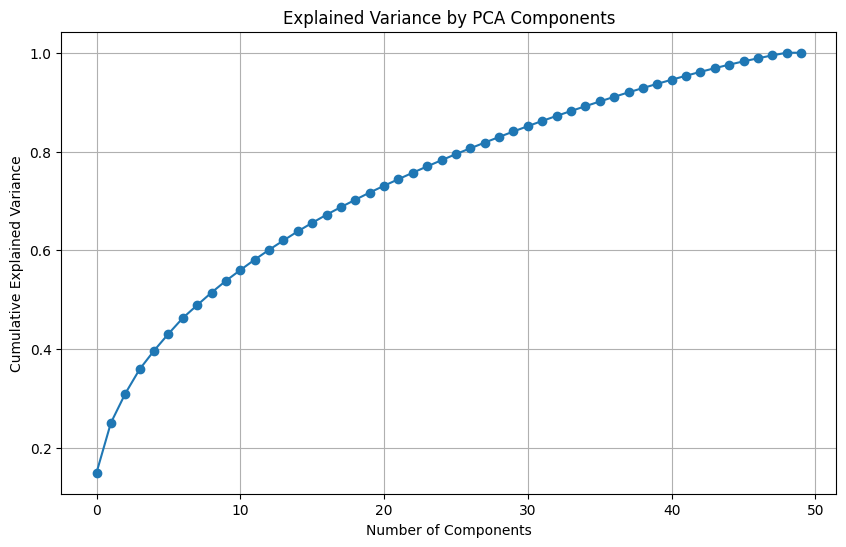

In [ ]:
# Plot cumulative explained variance to select number of components
plt.figure(figsize=(10, 6))
plt.plot(np.cumsum(pca.explained_variance_ratio_), marker='o')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance by PCA Components')
plt.grid(True)
plt.show()

In [ ]:
# Choose a number of components that explain ~95% of variance
n_components = np.argmax(np.cumsum(pca.explained_variance_ratio_) >= 0.95) + 1
print(f"Number of components explaining ~95% variance: {n_components}")

Number of components explaining ~95% variance: 42


In [ ]:
# Step-3 Model Training and Evaluation
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.ensemble import StackingClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, matthews_corrcoef, confusion_matrix

In [ ]:
# Initialize a dictionary to store the results
results = {
    "Model": [],
    "Accuracy": [],
    "Sensitivity": [],
    "Specificity": [],
    "Precision": [],
    "F1 Score": [],
    "MCC": []
}

# Define a list of models
models = {
    "Logistic Regression": LogisticRegression(),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "SVM": SVC(),
    "Naïve Bayes": GaussianNB(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "Adaboost + Random Forest": AdaBoostClassifier(estimator=RandomForestClassifier(), random_state=42),
    "Adaboost + SVM": AdaBoostClassifier(estimator=SVC(probability=True), random_state=42),
    "XGBoost": XGBClassifier(eval_metric='logloss', use_label_encoder=False),
}

In [ ]:
# Ensemble (Stacking)
stacking_model = StackingClassifier(
    estimators=[
        ('naive_bayes', GaussianNB()),
        ('svm', SVC(probability=True)),
        ('random_forest', RandomForestClassifier())
    ],
    final_estimator=LogisticRegression(),
    stack_method='predict_proba',
    cv=5
)
models["Stacking Ensemble"] = stacking_model


Without PCA

In [ ]:
# Train and evaluate each model
for name, model in models.items():
    # Fit model on original feature set
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred)
    sensitivity = recall_score(y_test, y_pred, average='macro')
    specificity = recall_score(y_test, y_pred, pos_label=0, average='macro')
    precision = precision_score(y_test, y_pred, average='macro')
    f1 = f1_score(y_test, y_pred, average='macro')
    mcc = matthews_corrcoef(y_test, y_pred)

    # Store results
    results["Model"].append(name)
    results["Accuracy"].append(accuracy)
    results["Sensitivity"].append(sensitivity)
    results["Specificity"].append(specificity)
    results["Precision"].append(precision)
    results["F1 Score"].append(f1)
    results["MCC"].append(mcc)

# Convert results to a DataFrame for better readability
results_df = pd.DataFrame(results)
print("\nModel Performance on Original Feature Set:")
display(results_df)


Model Performance on Original Feature Set:


,Model,Accuracy,Sensitivity,Specificity,Precision,F1 Score,MCC
0,Logistic Regression,0.863636,0.809524,0.809524,0.888889,0.817369,0.741803
1,K-Nearest Neighbors,0.681818,0.476190,0.476190,0.728070,0.507071,0.299187
2,SVM,0.681818,0.476190,0.476190,0.450292,0.453102,0.304390
3,Naïve Bayes,0.863636,0.809524,0.809524,0.888889,0.817369,0.741803
4,Decision Tree,0.772727,0.702381,0.702381,0.814815,0.646154,0.645919
5,Random Forest,0.818182,0.726190,0.726190,0.870833,0.718519,0.650828
6,Adaboost + Random Forest,0.772727,0.642857,0.642857,0.481481,0.526116,0.637377
7,Adaboost + SVM,0.772727,0.642857,0.642857,0.521569,0.575866,0.556050
8,XGBoost,0.863636,0.809524,0.809524,0.865079,0.798413,0.754063
9,Stacking Ensemble,0.863636,0.809524,0.809524,0.865079,0.798413,0.754063


In [ ]:
# Find the index of the row with the highest accuracy
best_index = results_df["Accuracy"].idxmax()

# Extract the information about the best classifier
best_classifier_name = results_df.loc[best_index, "Model"]
best_classifier_accuracy = results_df.loc[best_index, "Accuracy"]

# Print conclusion
print(f"The best classifier is '{best_classifier_name}' with an accuracy of {best_classifier_accuracy:.2%}.")

The best classifier is 'Logistic Regression' with an accuracy of 86.36%.


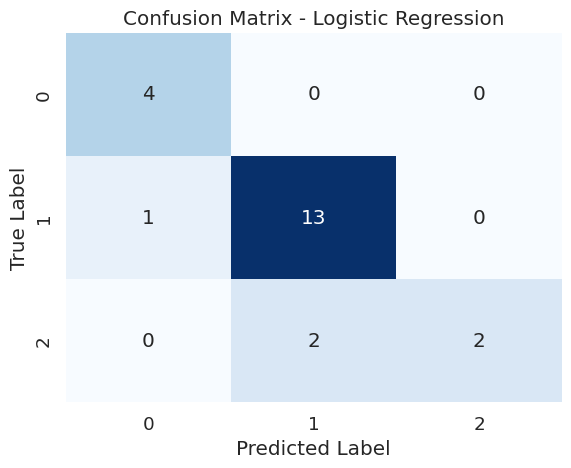

In [ ]:
# Access the best classifier
best_classifier = models[best_classifier_name]

# Train the best classifier
best_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = best_classifier.predict(X_test)

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix for the best classifier
sns.set(font_scale=1.2)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title(f"Confusion Matrix - {best_classifier_name}")
plt.show()

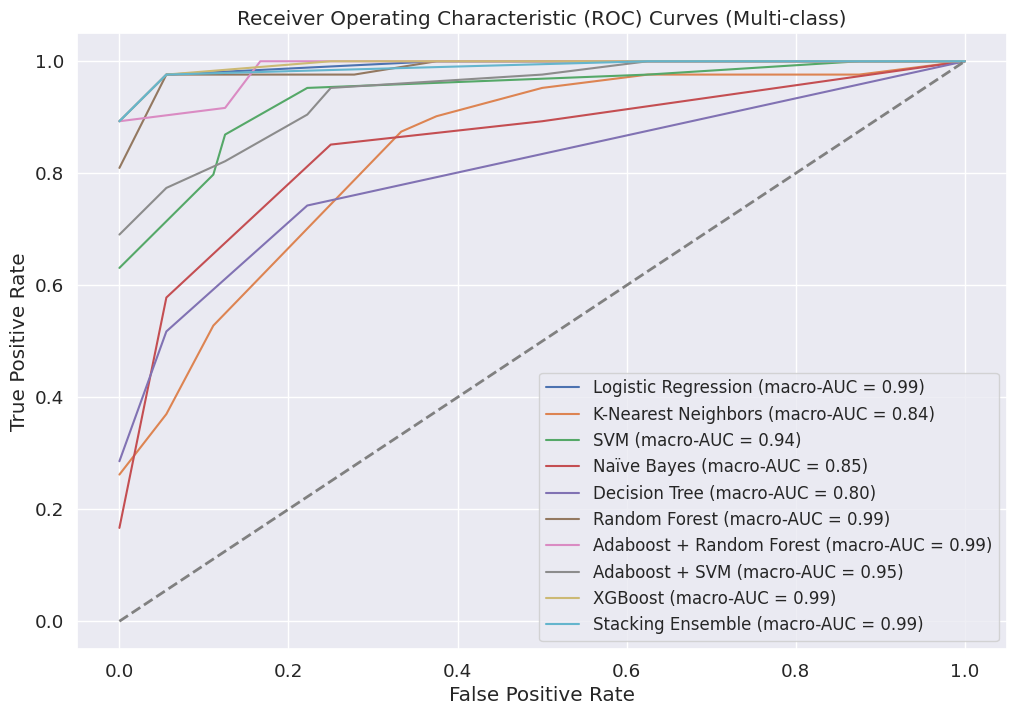

In [ ]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize

# Binarize the labels for multi-class ROC (One-vs-Rest)
classes = np.unique(y_train)  # Get unique classes
y_test_binarized = label_binarize(y_test, classes=classes)
y_train_binarized = label_binarize(y_train, classes=classes)
n_classes = len(classes)

# Initialize a figure for ROC curves
plt.figure(figsize=(12, 8))

# Iterate through models to calculate and plot ROC curves
for name, clf in models.items():
    # Fit the model and get prediction probabilities
    clf.fit(X_train, y_train)
    if hasattr(clf, "predict_proba"):  # Check if model supports predict_proba
        y_score = clf.predict_proba(X_test)
    else:  # Use decision_function for models like SVC without predict_proba
        y_score = clf.decision_function(X_test)

    # Compute ROC curve and AUC for each class
    fpr, tpr, roc_auc = dict(), dict(), dict()
    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_test_binarized[:, i], y_score[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    # Compute macro-average ROC curve and AUC
    all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))
    mean_tpr = np.zeros_like(all_fpr)
    for i in range(n_classes):
        mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])
    mean_tpr /= n_classes

    fpr["macro"] = all_fpr
    tpr["macro"] = mean_tpr
    roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

    # Plot the macro-average ROC curve
    plt.plot(
        fpr["macro"],
        tpr["macro"],
        label=f'{name} (macro-AUC = {roc_auc["macro"]:.2f})'
    )

# Plot the diagonal line (random classifier)
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', lw=2)

# Configure the plot
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curves (Multi-class)')
plt.legend(fontsize='small')
plt.grid(True)
plt.show()



With PCA


In [ ]:
# Repeat for PCA-transformed feature set
# Initialize a new dictionary to store PCA results
pca_results = {
    "Model": [],
    "Accuracy": [],
    "Sensitivity": [],
    "Specificity": [],
    "Precision": [],
    "F1 Score": [],
    "MCC": []
}

# Train and evaluate each model on PCA-transformed data
for name, model in models.items():
    model.fit(X_train_pca, y_train)
    y_pred = model.predict(X_test_pca)

    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred)
    sensitivity = recall_score(y_test, y_pred, average='macro')
    specificity = recall_score(y_test, y_pred, pos_label=0, average='macro')
    precision = precision_score(y_test, y_pred, average='macro')
    f1 = f1_score(y_test, y_pred, average='macro')
    mcc = matthews_corrcoef(y_test, y_pred)

    # Store PCA results
    pca_results["Model"].append(name)
    pca_results["Accuracy"].append(accuracy)
    pca_results["Sensitivity"].append(sensitivity)
    pca_results["Specificity"].append(specificity)
    pca_results["Precision"].append(precision)
    pca_results["F1 Score"].append(f1)
    pca_results["MCC"].append(mcc)

# Convert PCA results to a DataFrame for better readability
pca_results_df = pd.DataFrame(pca_results)
print("\nModel Performance on PCA-Reduced Feature Set:")
display(pca_results_df)


Model Performance on PCA-Reduced Feature Set:


,Model,Accuracy,Sensitivity,Specificity,Precision,F1 Score,MCC
0,Logistic Regression,0.863636,0.750000,0.750000,0.941176,0.767742,0.749532
1,K-Nearest Neighbors,0.636364,0.392857,0.392857,0.383333,0.366013,0.139754
2,SVM,0.727273,0.500000,0.500000,0.566667,0.496732,0.447214
3,Naïve Bayes,0.590909,0.309524,0.309524,0.206349,0.247619,-0.115728
4,Decision Tree,0.727273,0.559524,0.559524,0.454902,0.501792,0.450592
5,Random Forest,0.727273,0.500000,0.500000,0.566667,0.496732,0.447214
6,Adaboost + Random Forest,0.772727,0.583333,0.583333,0.509259,0.541667,0.552083
7,Adaboost + SVM,0.727273,0.559524,0.559524,0.796296,0.594643,0.428661
8,XGBoost,0.818182,0.666667,0.666667,0.541176,0.597372,0.661507
9,Stacking Ensemble,0.772727,0.642857,0.642857,0.838235,0.662903,0.543410


<Figure size 1500x800 with 0 Axes>

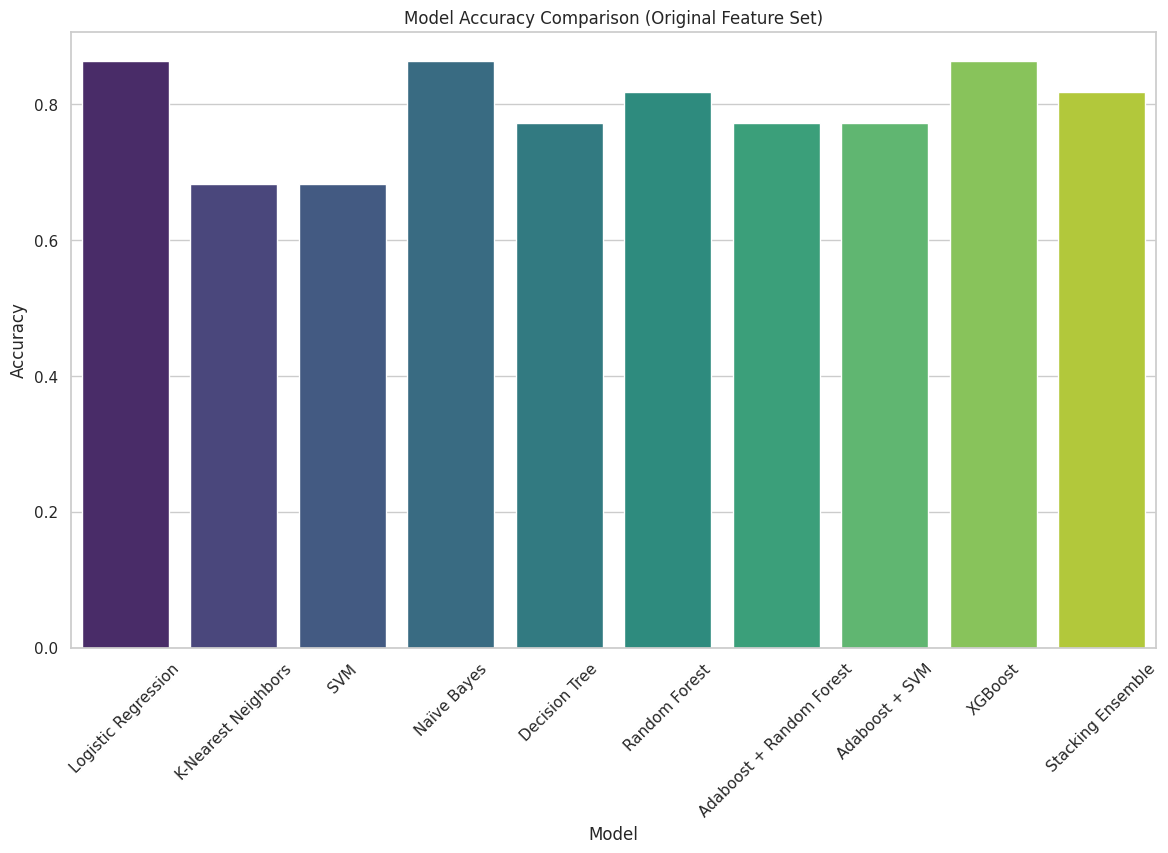

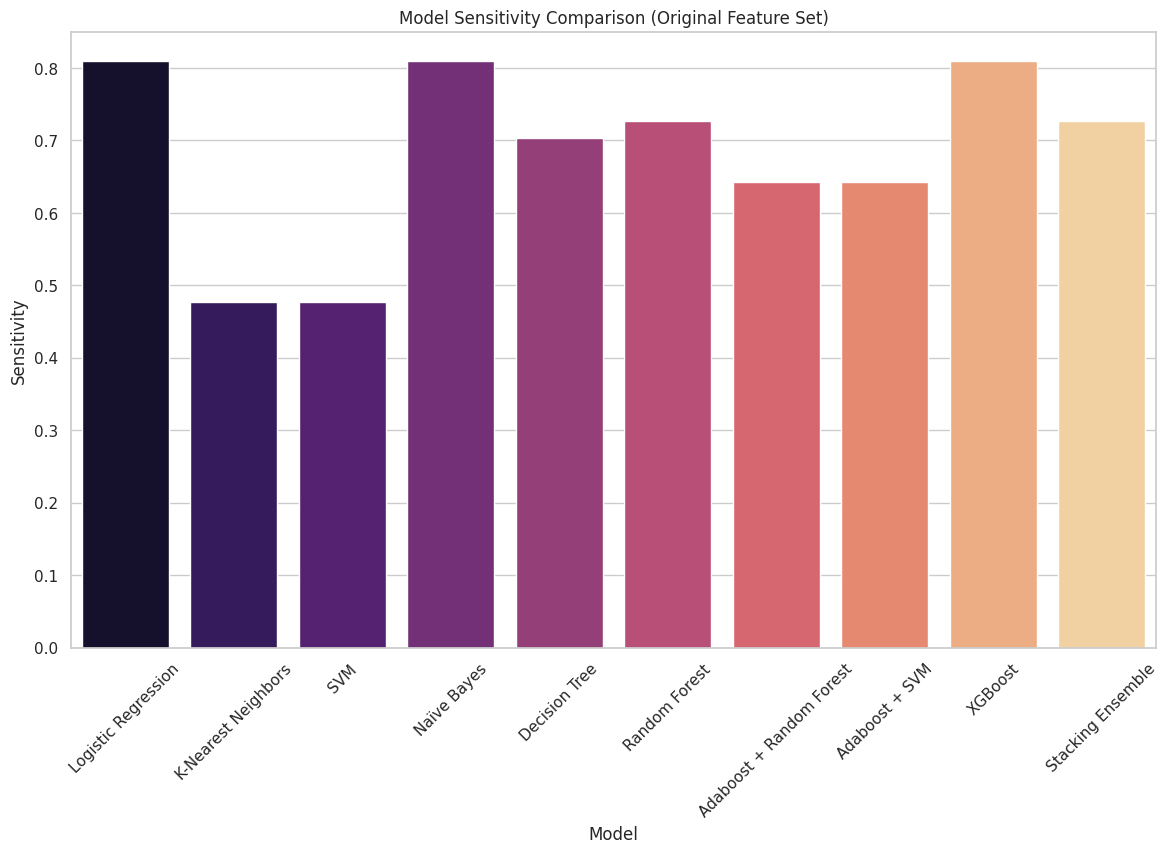

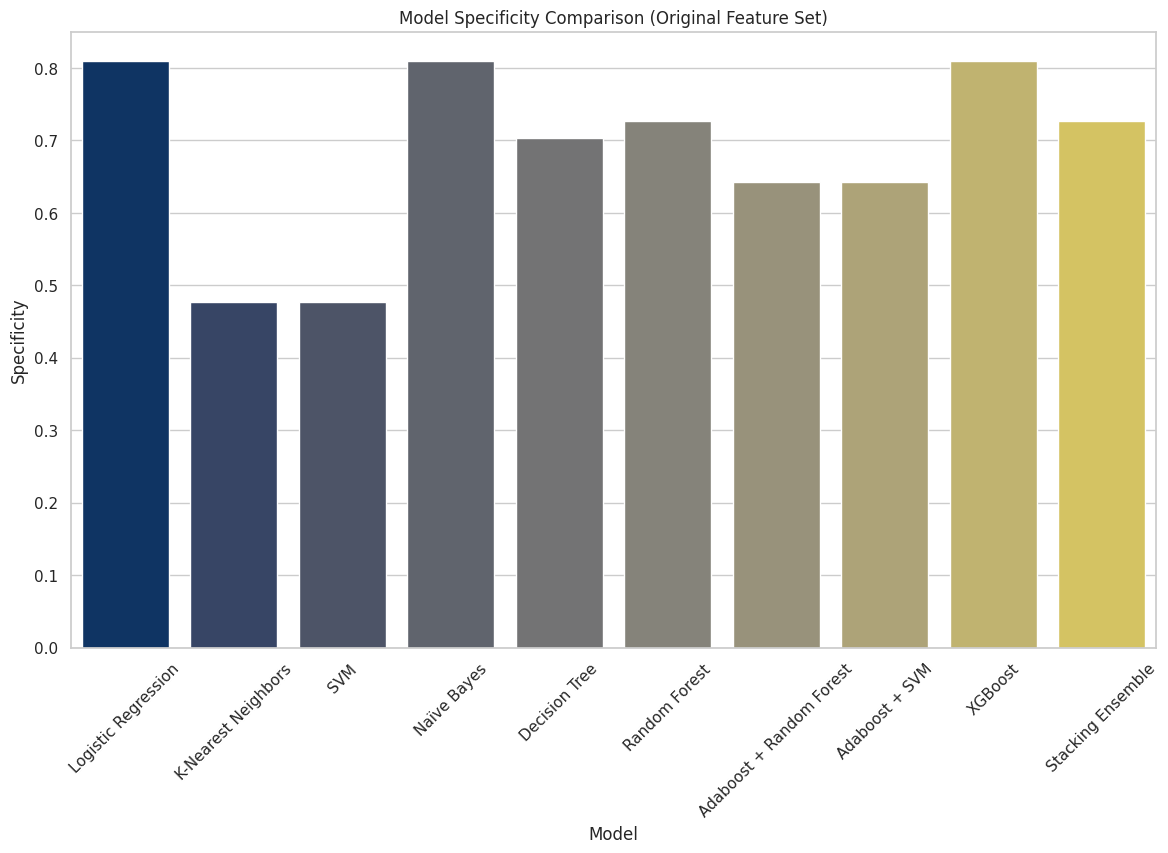

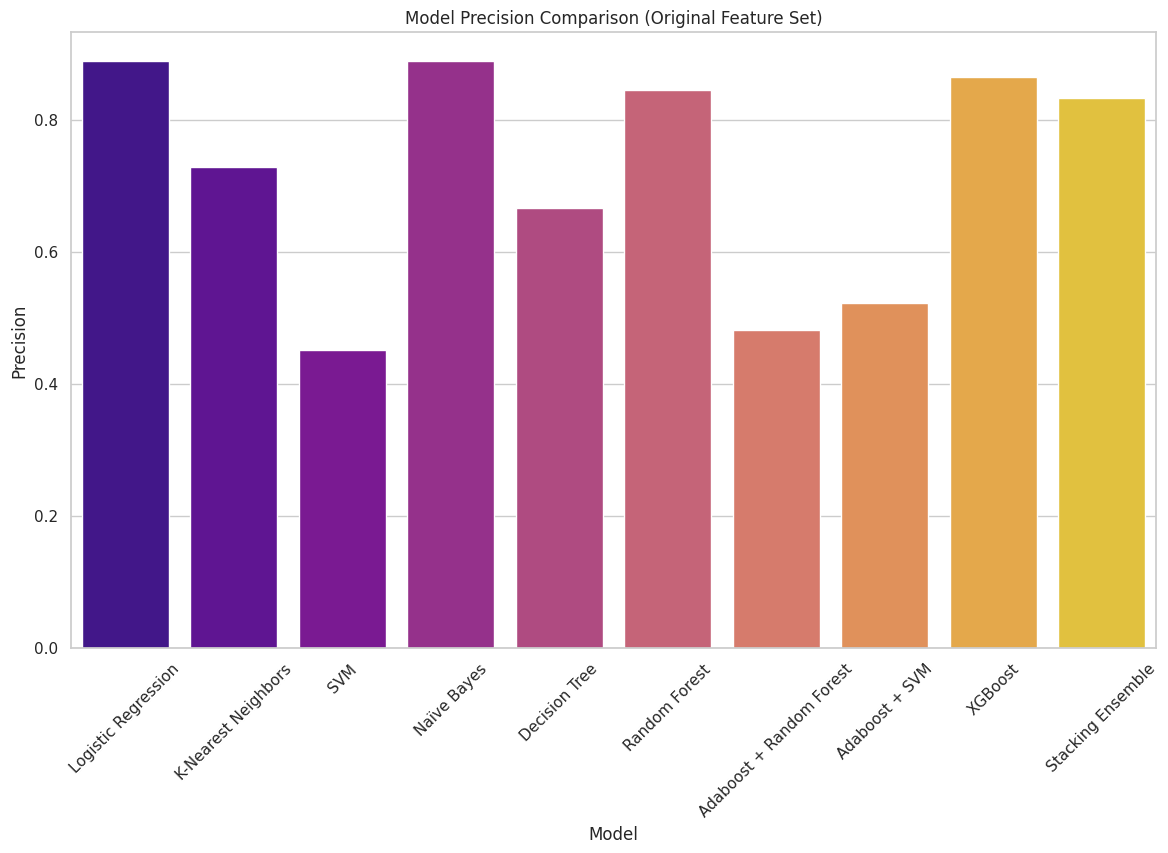

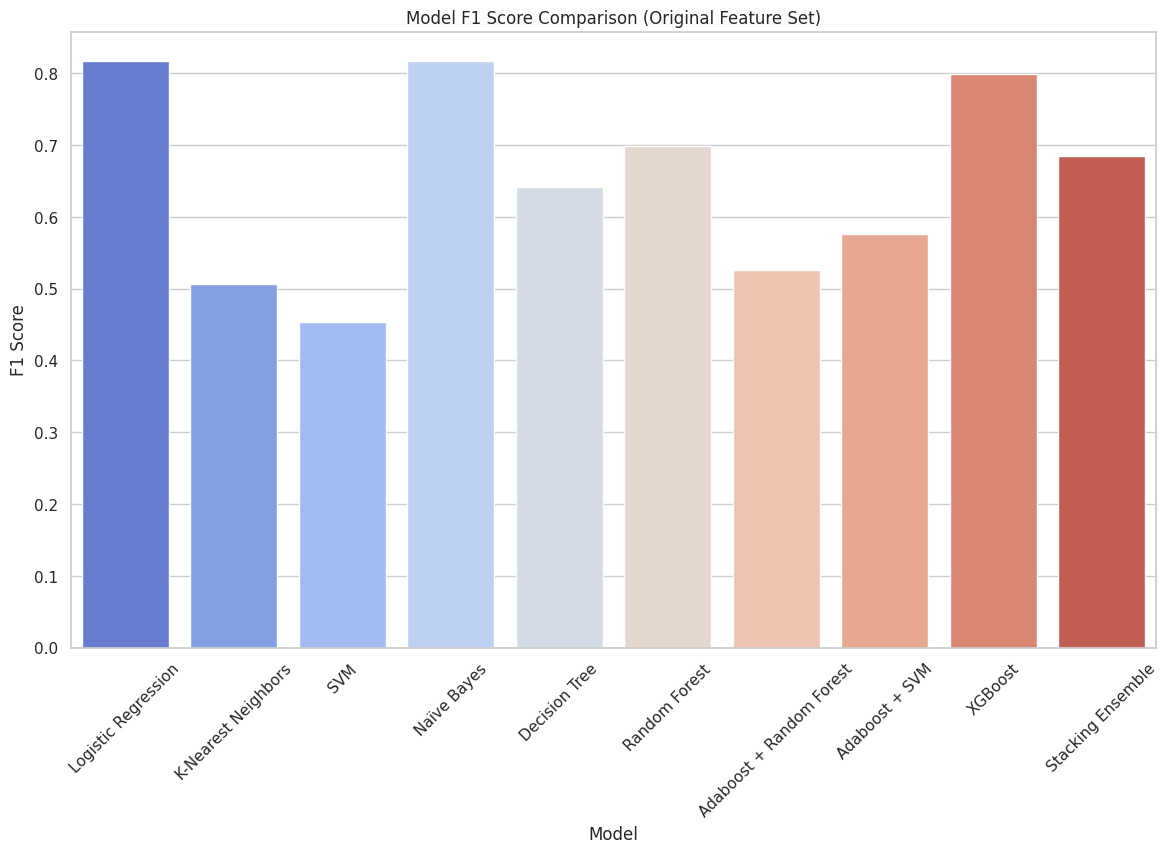

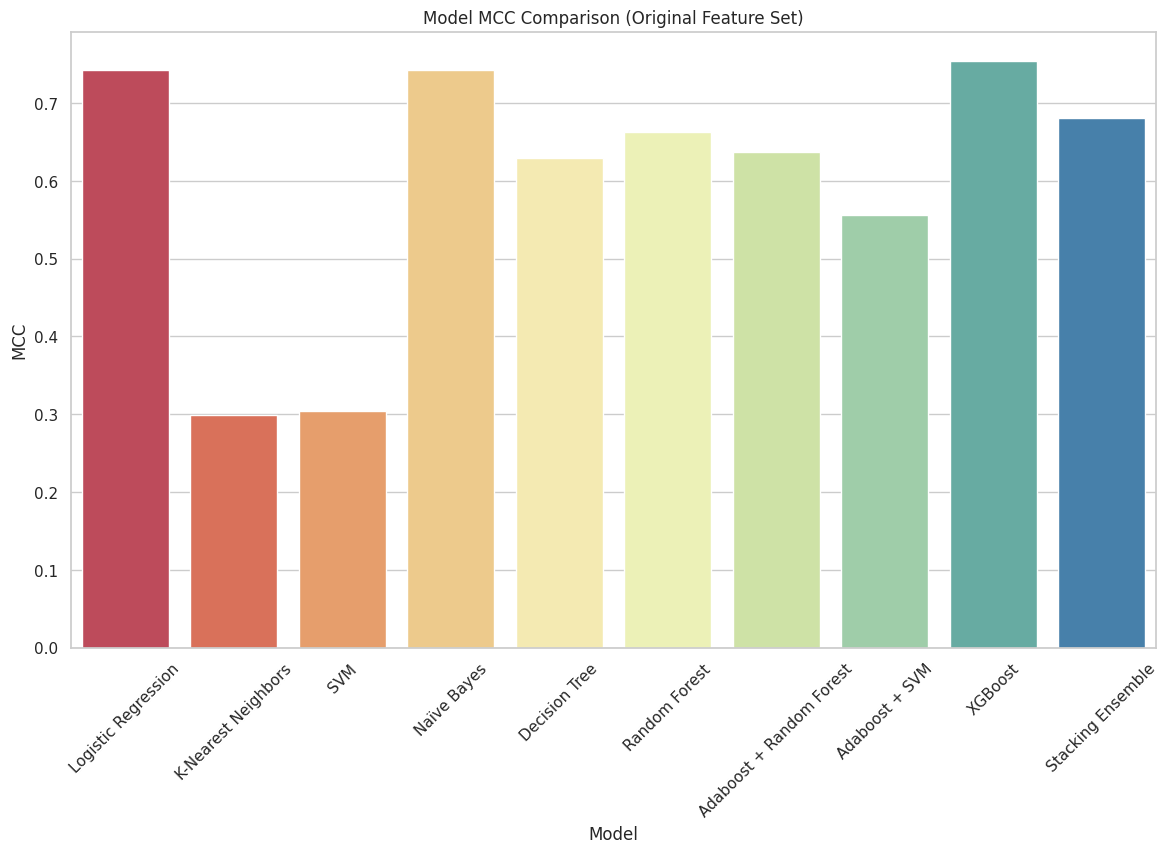

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set up the visualization style
sns.set(style="whitegrid")
plt.figure(figsize=(15, 8))

# Convert the results to a DataFrame for easier plotting (original feature set)
results_df = pd.DataFrame(results)

# Plot Accuracy Comparison
plt.figure(figsize=(14, 8))
sns.barplot(x="Model", y="Accuracy", data=results_df, palette="viridis")
plt.title("Model Accuracy Comparison (Original Feature Set)")
plt.xticks(rotation=45)
plt.show()

# Plot Sensitivity Comparison
plt.figure(figsize=(14, 8))
sns.barplot(x="Model", y="Sensitivity", data=results_df, palette="magma")
plt.title("Model Sensitivity Comparison (Original Feature Set)")
plt.xticks(rotation=45)
plt.show()

# Plot Specificity Comparison
plt.figure(figsize=(14, 8))
sns.barplot(x="Model", y="Specificity", data=results_df, palette="cividis")
plt.title("Model Specificity Comparison (Original Feature Set)")
plt.xticks(rotation=45)
plt.show()

# Plot Precision Comparison
plt.figure(figsize=(14, 8))
sns.barplot(x="Model", y="Precision", data=results_df, palette="plasma")
plt.title("Model Precision Comparison (Original Feature Set)")
plt.xticks(rotation=45)
plt.show()

# Plot F1 Score Comparison
plt.figure(figsize=(14, 8))
sns.barplot(x="Model", y="F1 Score", data=results_df, palette="coolwarm")
plt.title("Model F1 Score Comparison (Original Feature Set)")
plt.xticks(rotation=45)
plt.show()

# Plot MCC Comparison
plt.figure(figsize=(14, 8))
sns.barplot(x="Model", y="MCC", data=results_df, palette="Spectral")
plt.title("Model MCC Comparison (Original Feature Set)")
plt.xticks(rotation=45)
plt.show()

In [ ]:
# Compare the performance of models on original and PCA-reduced datasets
comparison_df = pd.merge(results_df, pca_results_df, on='Model', suffixes=('_Original', '_PCA'))

# Calculate the difference in accuracy between original and PCA datasets
comparison_df['Accuracy_Difference'] = comparison_df['Accuracy_PCA'] - comparison_df['Accuracy_Original']

# Display the comparison dataframe
print("\nComparison of Model Performance (Original vs. PCA):")
display(comparison_df)


Comparison of Model Performance (Original vs. PCA):


,Model,Accuracy_Original,Sensitivity_Original,Specificity_Original,Precision_Original,F1 Score_Original,MCC_Original,Accuracy_PCA,Sensitivity_PCA,Specificity_PCA,Precision_PCA,F1 Score_PCA,MCC_PCA,Accuracy_Difference
0,Logistic Regression,0.863636,0.809524,0.809524,0.888889,0.817369,0.741803,0.863636,0.750000,0.750000,0.941176,0.767742,0.749532,0.000000
1,K-Nearest Neighbors,0.681818,0.476190,0.476190,0.728070,0.507071,0.299187,0.636364,0.392857,0.392857,0.383333,0.366013,0.139754,-0.045455
2,SVM,0.681818,0.476190,0.476190,0.450292,0.453102,0.304390,0.727273,0.500000,0.500000,0.566667,0.496732,0.447214,0.045455
3,Naïve Bayes,0.863636,0.809524,0.809524,0.888889,0.817369,0.741803,0.590909,0.309524,0.309524,0.206349,0.247619,-0.115728,-0.272727
4,Decision Tree,0.772727,0.702381,0.702381,0.666667,0.641026,0.629077,0.727273,0.559524,0.559524,0.454902,0.501792,0.450592,-0.045455
5,Random Forest,0.818182,0.726190,0.726190,0.844444,0.698851,0.662767,0.727273,0.500000,0.500000,0.566667,0.496732,0.447214,-0.090909
6,Adaboost + Random Forest,0.772727,0.642857,0.642857,0.481481,0.526116,0.637377,0.772727,0.583333,0.583333,0.509259,0.541667,0.552083,0.000000
7,Adaboost + SVM,0.772727,0.642857,0.642857,0.521569,0.575866,0.556050,0.727273,0.559524,0.559524,0.796296,0.594643,0.428661,-0.045455
8,XGBoost,0.863636,0.809524,0.809524,0.865079,0.798413,0.754063,0.818182,0.666667,0.666667,0.541176,0.597372,0.661507,-0.045455
9,Stacking Ensemble,0.818182,0.726190,0.726190,0.833333,0.685281,0.680614,0.772727,0.642857,0.642857,0.838235,0.662903,0.543410,-0.045455


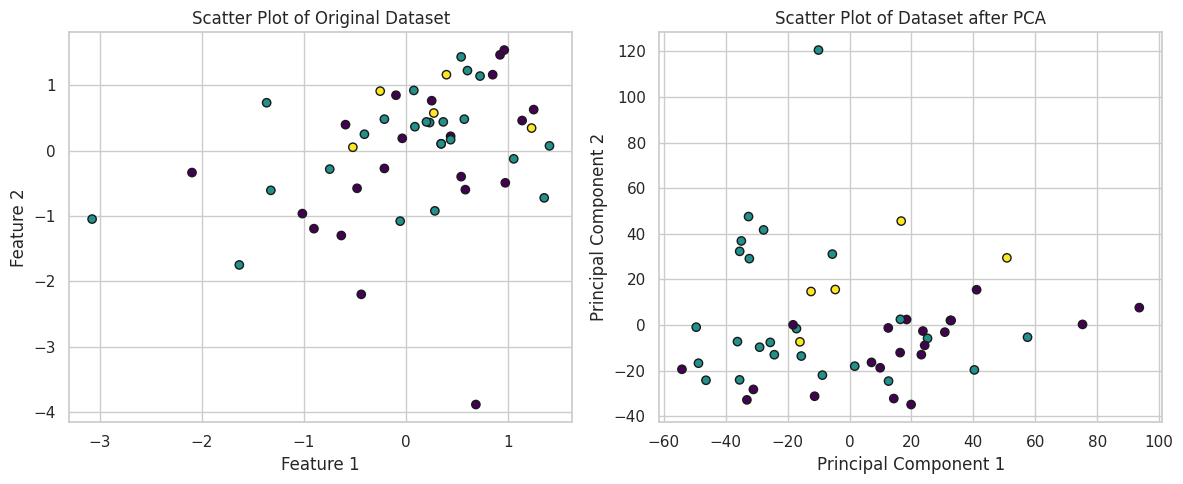

In [ ]:
# Scatter plot for the original dataset and dataset after applying PCA
fig, axs = plt.subplots(1, 2, figsize=(12, 5))

# Scatter plot for the original dataset
axs[0].scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap='viridis', marker='o', edgecolors='k')
axs[0].set_title('Scatter Plot of Original Dataset')
axs[0].set_xlabel('Feature 1')
axs[0].set_ylabel('Feature 2')

# Scatter plot for the dataset after applying PCA
axs[1].scatter(X_train_pca[:, 0], X_train_pca[:, 1], c=y_train, cmap='viridis', marker='o', edgecolors='k')
axs[1].set_title('Scatter Plot of Dataset after PCA')
axs[1].set_xlabel('Principal Component 1')
axs[1].set_ylabel('Principal Component 2')

plt.tight_layout()
plt.show()


In [ ]:
# Find the index of the row with the highest accuracy with PCA
best_index_pca = pca_results_df ["Accuracy"].idxmax()

# Extract the information about the best classifier with PCA
best_classifier_name_pca = pca_results_df.loc[best_index_pca, "Model"]
best_classifier_accuracy_pca = pca_results_df.loc[best_index_pca, "Accuracy"]

# Print conclusion with PCA
print(f"The best classifier with PCA is '{best_classifier_name_pca}' with an accuracy of {best_classifier_accuracy_pca:.2%}.")



The best classifier with PCA is 'Logistic Regression' with an accuracy of 86.36%.


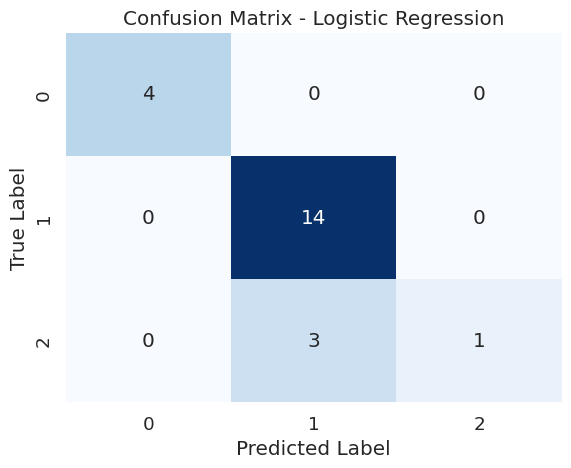

In [ ]:
# Access the best classifier with PCA
best_classifier_pca = models[best_classifier_name_pca.split('PCA + ')[-1]]

# Train the best classifier with PCA
best_classifier_pca.fit(X_train_pca, y_train)

# Make predictions on the test set with PCA
y_pred_pca = best_classifier_pca.predict(X_test_pca)

# Compute confusion matrix with PCA
cm_pca = confusion_matrix(y_test, y_pred_pca)

# Plot confusion matrix for the best classifier with PCA
sns.set(font_scale=1.2)
sns.heatmap(cm_pca, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title(f"Confusion Matrix - {best_classifier_name_pca}")
plt.show()

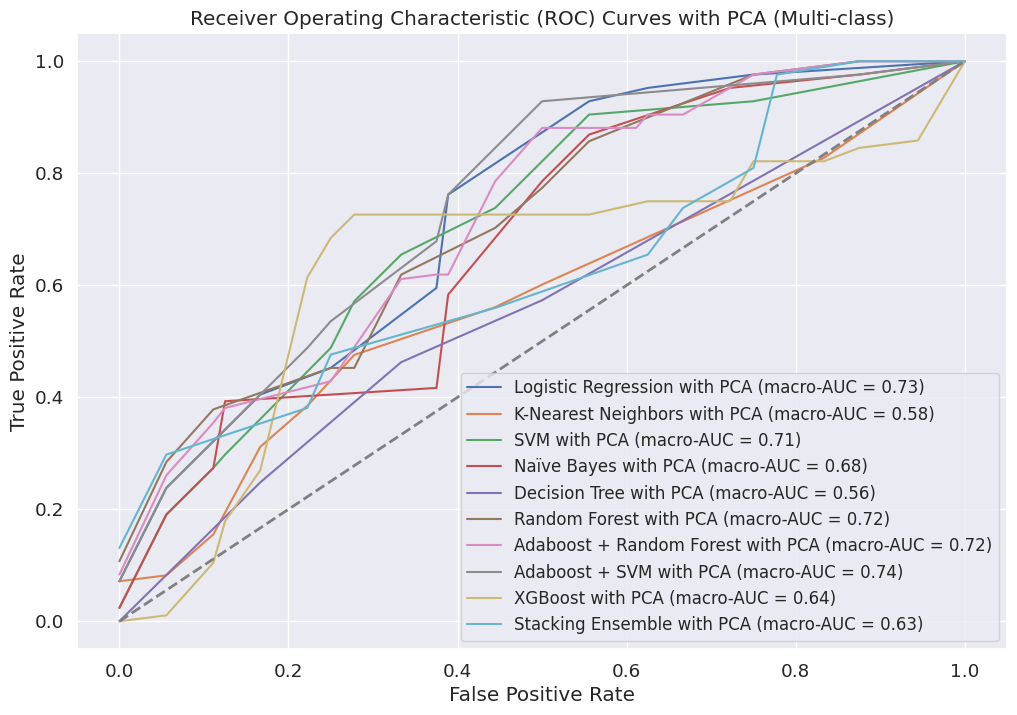

In [ ]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc
import numpy as np
import matplotlib.pyplot as plt

# Perform PCA transformation
pca = PCA(n_components=2)  # Adjust the number of components as needed
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

# Binarize labels for multi-class
classes = np.unique(y_train)  # Get unique classes
y_test_binarized = label_binarize(y_test, classes=classes)
y_train_binarized = label_binarize(y_train, classes=classes)
n_classes = len(classes)

# Initialize a figure for ROC curves
plt.figure(figsize=(12, 8))

# Iterate through models to calculate and plot ROC curves with PCA
for name, clf in models.items():
    # Fit the model and get prediction probabilities
    clf.fit(X_train_pca, y_train)
    if hasattr(clf, "predict_proba"):  # Check if model supports predict_proba
        y_score = clf.predict_proba(X_test_pca)
    else:  # Use decision_function for models like SVC without predict_proba
        y_score = clf.decision_function(X_test_pca)

    # Compute ROC curve and AUC for each class
    fpr, tpr, roc_auc = dict(), dict(), dict()
    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_test_binarized[:, i], y_score[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    # Compute macro-average ROC curve and AUC
    all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))
    mean_tpr = np.zeros_like(all_fpr)
    for i in range(n_classes):
        mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])
    mean_tpr /= n_classes

    fpr["macro"] = all_fpr
    tpr["macro"] = mean_tpr
    roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

    # Plot the macro-average ROC curve
    plt.plot(
        fpr["macro"],
        tpr["macro"],
        label=f'{name} with PCA (macro-AUC = {roc_auc["macro"]:.2f})'
    )

# Plot the diagonal line (random classifier)
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', lw=2)

# Configure the plot
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curves with PCA (Multi-class)')
plt.legend(fontsize='small')
plt.grid(True)
plt.show()


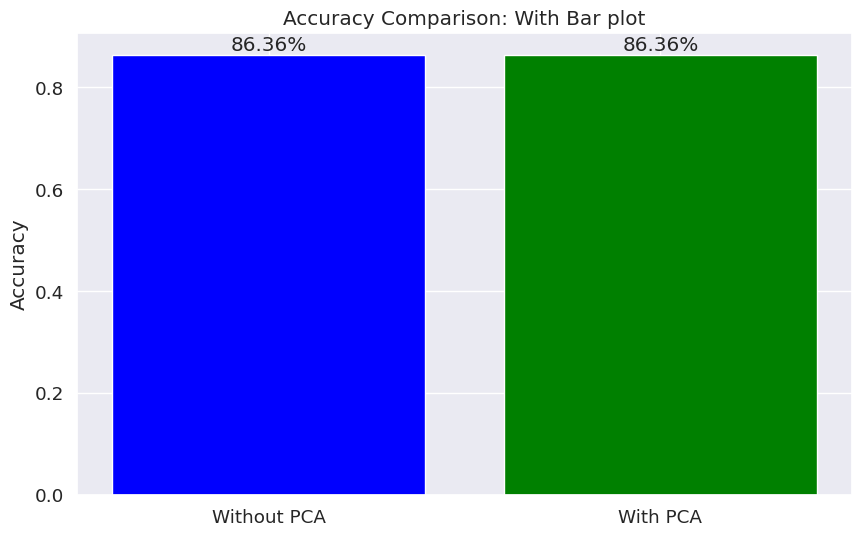

In [ ]:
# Bar plot for accuracy comparison
plt.figure(figsize=(10, 6))
bars = plt.bar(["Without PCA", "With PCA"], [best_classifier_accuracy, best_classifier_accuracy_pca], color=['blue', 'green'])

# Add values inside the bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, f"{round(yval * 100, 2)}%", ha='center', va='bottom')

plt.ylabel("Accuracy")
plt.title("Accuracy Comparison: With Bar plot")
plt.show()